<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков-в-данных" data-toc-modified-id="Заполнение-пропусков-в-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков в данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

В проекте необходимо выполнить следующие шаги: загрузить и изучить данные, выполнить предобработку данных, добавить данные в таблицу, провести анализ данных и составить общий вывод по проекту.

В итоге мы должны получить анализ какие параметры оказывают большее влияние на стоимость квартиры.

## Изучение данных из файла

Подключим библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
pth1 = 'real_estate_data.csv'
pth2 = 'https://code.s3.yandex.net/datasets/real_estate_data.csv'
    
if os.path.exists(pth1):
    df = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')

Посмотрим на первые пять строчек датафрейма для общего представления.

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получим общую информацию о данных.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В данных 22 столбца и 23699 строк.

Далее посмотрим статистическую информацию о данных.

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Данные состоят из 23699 строк и 22 столбцов.  
Максимальное значение высоты потолков - 100 м, минимальное значение - 1 м, такого не может быть - нужно будет обработать эти значение.  
Минимальное расстояние до аэропорта - 0 м, такого не может быть.

## Предобработка данных

### Заполнение пропусков в данных

Проверим количество пропусков.

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Определим доли пропусков по столбцам

In [7]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Доля пропусков в столбце с количеством этажей всего 0,36%, отсутствие этих данных не повлияет на результат исследования.

Доля пропусков в столбце с названиями населенных пунктов всего 0,2%, отсутствие этих данных не повлияет на результат исследования

Высота потолков не указана в 9195 случаях, этажей в доме - в 86 случаях, жилая площадь - в 1903 случаях, являются ли апартаментами - в 20924 случаях, площадь кухни - в 2278 случаях, балкон - в 11519 случаях, название населенного пункта - в 49 случаях, расстояние до ближайшего аэропорта - в 5542 случаях, расстояние до центра города - в 5519 случаях, количество парков радиусе 3 км - в 5518 случаях, расстояние до ближайшего парка - в 15620 случаях, число водоемов в радиусе 3 км - в 5518 случаях, расстояние до ближайшего водоема - в 14589 случаях и сколько дней было размещени объявление - в 3181 случае.

В столбце is_apartment пропуски можно заменить на False, так как люди при заполнение данных просто пропускают эту графу из-за того, что они продают квартиру.

In [8]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Аналогично поступаем с столбцом balcony, продавцы квартир без балконов скорее всего пропускали эти данные

In [9]:
df['balcony'] = df['balcony'].fillna(0)

Пропуски в столбце ceiling_height не представляется возможным заполнить, так как высота потолков может сильно отличаться. Если бы у нас в данных были адреса, то можно было бы запонить средними значениями по дому, исключая верхние этажи.  
Пропуски в столбце floors_total не представляется возможным заполнить, так как количество этажей разнится от дома к дому. Если бы у нас в данных были адреса, то можно было бы получить эти данные из других объявлений.  
Пропуски в столбце living_area не представляется возможным заполнить.  
Пропуски в столбце kitchen_area не представляется возможным заполнить.  
Пропуски в столбце locality_name не представляется возможным заполнить. Можно заполнить значения найдя объявления с близким значением расстояния до аэропорта, но, думаю, что таким образом только внесу больше ошибок в данные.  
Пропуски в airports_nearest не представляется возможным заполнить. Можно попытаться заполнить данными с других объявлений с тех же населеных пунктов.  
Пропуски в cityCenters_nearest не представляется возможным заполнить.   
Пропуски в parks_nearest не представляется возможным заполнить.  
Пропуски в ponds_nearest не представляется возможным заполнить.  
Пропуски в days_exposition не представляется возможным заполнить.  

Поменяем значения высоты потолком менее 2.5 м (по САНПИНу меньше не должно быть) и более 10 м (предположим, что бывают трехярусные квартиры, где каждый этаж по 3 м и есть пространство, где все это сделано в очень высокий этаж) на NaN.

In [10]:
df.loc[(df['ceiling_height'] < 2.5) | (df['ceiling_height'] > 10), 'ceiling_height'] = np.nan

Поменяем значения расстояния до аэропорта 0 м на NaN.

In [11]:
df.loc[df['airports_nearest'] == 0, 'airports_nearest'] = np.nan

In [12]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14406.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18156.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.730103,10.673824,34.457852,5.892358,10.569807,0.591080,28795.258096,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.291818,6.597173,22.030445,4.885249,5.905438,0.959298,12629.420568,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.500000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,8.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Посмотрим на типы данных наших столбцов

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14406 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Тип данных first_day_exposition поменяем на datetime - дата продажи,  
floors_total поменяем на int - могут быть только целочисленные значения,  
balcony поменяем на int - могут быть только целочисленные значения,  
airports_nearest поменяем на int - могут быть только целочисленные значения,  
cityCenters_nearest поменяем на int - могут быть только целочисленные значения,  
parks_around3000 поменяем на int - могут быть только целочисленные значения,  
parks_nearest поменяем на int - могут быть только целочисленные значения,  
ponds_around3000 поменяем на int - могут быть только целочисленные значения,  
ponds_nearest поменяем на int - могут быть только целочисленные значения,  
days_exposition поменяем на int - могут быть только целочисленные значения.

In [14]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14406.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18156.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.730103,10.673824,34.457852,5.892358,10.569807,0.591080,28795.258096,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.291818,6.597173,22.030445,4.885249,5.905438,0.959298,12629.420568,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.500000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,8.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [15]:
pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [16]:
df['floors_total'] = df['floors_total'].astype('int8', errors='ignore')

In [17]:
df['balcony'] = df['balcony'].astype('int8')

In [18]:
df['airports_nearest'] = df['airports_nearest'].astype('int32', errors='ignore')

In [19]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int32', errors='ignore')

In [20]:
df['parks_around3000'] = df['parks_around3000'].astype('int8', errors='ignore')

In [21]:
df['parks_nearest'] = df['parks_nearest'].astype('int16', errors='ignore')

In [22]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int8', errors='ignore')

In [23]:
df['ponds_nearest'] = df['ponds_nearest'].astype('int16', errors='ignore')

In [24]:
df['days_exposition'] = df['days_exposition'].astype('int16', errors='ignore')

In [25]:
df['last_price'] = df['last_price'].astype('float32')
df['total_area'] = df['total_area'].astype('float32')
df['ceiling_height'] = df['ceiling_height'].astype('float32')
df['floors_total'] = df['floors_total'].astype('float32')
df['living_area'] = df['living_area'].astype('float32')
df['kitchen_area'] = df['kitchen_area'].astype('float32')
df['airports_nearest'] = df['airports_nearest'].astype('float32')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('float32')
df['parks_nearest'] = df['parks_nearest'].astype('float32')
df['ponds_nearest'] = df['ponds_nearest'].astype('float32')
df['days_exposition'] = df['days_exposition'].astype('float32')

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу цену квадратного метра для каждого объявления.

In [26]:
df['price_per_sq_m'] = df['last_price'] / df['total_area']

Добавим в таблицу день недели, месяц и год публикации объявления.

In [27]:
df['first_day_exposition_day'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek

In [28]:
df['first_day_exposition_month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [29]:
df['first_day_exposition_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

Добавим столбец, показывающий что это первый ('first') этаж, последний ('last') или другой ('another').

In [30]:
df['floor_category'] = 'another'
df.loc[df['floor'] == 1, 'floor_category'] = 'first'
df.loc[df['floor'] == df['floors_total'], 'floor_category'] = 'last'

Добавим в таблицу столбцы с соотношением жилой площади к общей и отношение площади кухни к общей площади.

In [31]:
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']

In [32]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_category,living_to_total,kitchen_to_total
0,20,13000000.0,108.000000,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,120370.367188,3,3,2019,another,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,False,...,0.0,NaN,81.0,82920.789062,1,12,2018,first,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20T00:00:00,2,NaN,5.0,34.299999,4,False,...,2.0,574.0,558.0,92785.710938,3,8,2015,another,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,408176.093750,4,7,2015,another,NaN,NaN
4,2,10000000.0,100.000000,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,another,0.320000,0.410000


## Исследовательский анализ данных

**Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.**

In [33]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,living_to_total,kitchen_to_total
count,23699.000000,23699.0,23699.000000,23699.000000,14406.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000
mean,9.858475,6541550.0,60.348774,2.070636,2.730111,10.673823,34.457726,5.892358,10.569776,0.591080,...,490.804565,0.770255,517.980896,180.888641,9.942161e+04,2.569307,6.400101,2017.367146,0.564768,0.187354
std,5.682529,10886946.0,35.654266,1.078405,0.291822,6.597260,22.030651,4.885249,5.905396,0.959298,...,342.318542,0.938346,277.720001,219.728500,5.030684e+04,1.789082,3.491561,1.039771,0.105368,0.072968
min,0.000000,12190.0,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3400000.0,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,294.000000,45.000000,7.658547e+04,1.000000,3.000000,2017.000000,0.495177,0.133333
50%,9.000000,4650000.0,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,455.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.567860,0.172414
75%,14.000000,6800000.0,69.900002,3.000000,2.800000,16.000000,42.299999,8.000000,12.000000,1.000000,...,612.000000,1.000000,729.000000,232.000000,1.142563e+05,4.000000,10.000000,2018.000000,0.637880,0.232416
max,50.000000,763000000.0,900.000000,19.000000,8.300000,60.000000,409.700012,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


Минимальное общей значение площади - 12, максимальное - 900, среднее - 60, медианное - 52.

Построим гистограмму общей площади. Так как данных много и все они отличаются (нет категорий), то зададим количество урн - 100. Максимальное значение - 900, но при это 75% меньше 70 кв.м - выбирем верхний предел графика - 200, нижний предел - 12 (минимальное значение в данных).

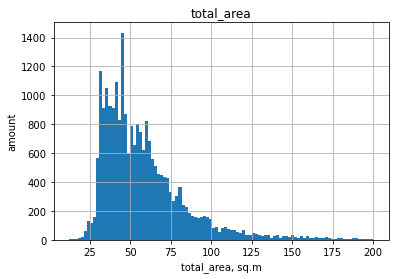

In [34]:
ax = df.hist(column='total_area', bins=100, range=(12,200))
ax = ax[0]
for x in ax:
    x.set_xlabel("total_area, sq.m")
    x.set_ylabel("amount")

Межквартальный размах для данных о площади составляет IQR = (69,9 - 40) = 29,9. Построим диаграмму по данным о площади, исключая значения выше Q3 + 1.5 * IQR = 69.9 + 1.5 * 29.9 = 114.75

In [35]:
df.loc[df['total_area'] > 114.75, 'total_area'] = np.nan

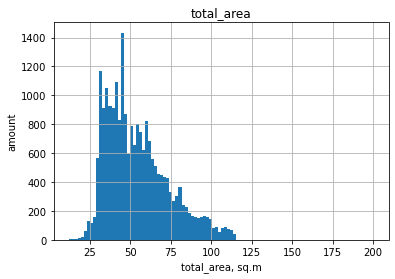

In [36]:
ax = df.hist(column='total_area', bins=100, range=(12,200))
ax = ax[0]
for x in ax:
    x.set_xlabel("total_area, sq.m")
    x.set_ylabel("amount")

In [37]:
df['total_area'].describe()

count    22459.000000
mean        54.364994
std         19.385317
min         12.000000
25%         39.400002
50%         50.099998
75%         65.599998
max        114.599998
Name: total_area, dtype: float64

Минимальная стоимость составляет 12190, максимальное - 763000000, средняя - 6541000, медианное - 4650000.
75% объектов имеют стоимость не более 6800000, стоимость имеет непрерывные значения, поэтому выберем количество корзин равное 30 и ограничим верхнюю границу стоимости - 100000000.

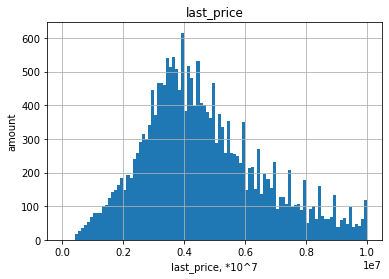

In [38]:
bx = df.hist(column='last_price',bins=100, range=(12190, 10000000))
bx = bx[0]
for x in bx:
    x.set_xlabel("last_price, *10^7")
    x.set_ylabel("amount")

###### Межквартальный размах для данных о цене IQR = (6800000 - 3400000) = 3400000. Построим диаграмму по данным о цене, исключая значения выше Q3 + 1.5 * IQR = 6800000 + 1.5 * 3400000 = 11900000

In [39]:
df.loc[df['last_price'] > 11900000, 'last_price'] = np.nan

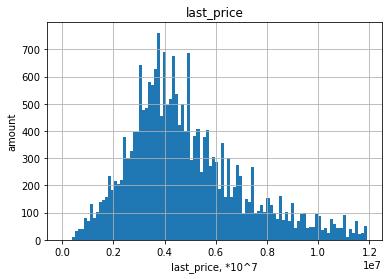

In [40]:
bx = df.hist(column='last_price',bins=100, range=(12190, 11900000))
bx = bx[0]
for x in bx:
    x.set_xlabel("last_price, *10^7")
    x.set_ylabel("amount")

In [41]:
df['last_price'].describe()

count       21665.0
mean      4848738.5
std       2229907.0
min         12190.0
25%       3300000.0
50%       4400000.0
75%       6000000.0
max      11900000.0
Name: last_price, dtype: float64

Количество комнат от 0 до 19, среднее и медианное количество комнат равно 2.

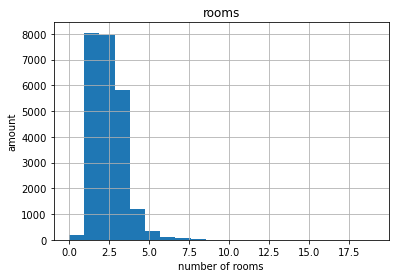

In [42]:
cx = df.hist(column='rooms', bins=20)
cx = cx[0]
for x in cx:
    x.set_xlabel("number of rooms")
    x.set_ylabel("amount")

Межквартальный размах для данных о количестве комнат IQR = 3 - 1 = 2. Построим диаграмму по данным о количестве комнат, исключая значения выше Q3 + 1.5 * IQR = 3 + 1.5 * 2 = 6

In [43]:
df.loc[df['rooms'] > 6, 'rooms'] = np.nan

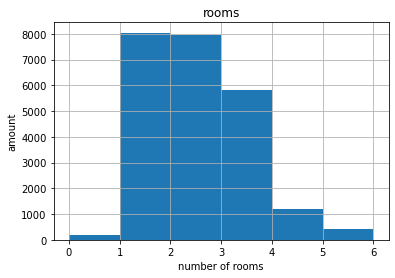

In [44]:
cx = df.hist(column='rooms', bins=6)
cx = cx[0]
for x in cx:
    x.set_xlabel("number of rooms")
    x.set_ylabel("amount")

In [45]:
df['rooms'].describe()

count    23609.000000
mean         2.047905
std          1.006772
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Высота потолков от 2,5 до 8.3 м, среднее и медианное значения - 2.7 м.

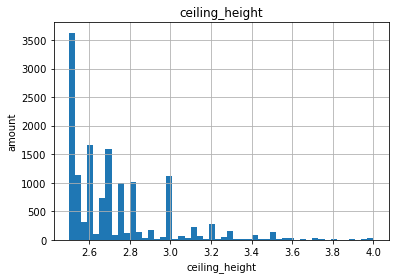

In [46]:
dx = df.hist(column='ceiling_height', bins=50, range=(2.5, 4))
dx = dx[0]
for x in dx:
    x.set_xlabel("ceiling_height")
    x.set_ylabel("amount")

Межквартальный размах для данных о высоте потолков IQR = 2.8 - 2.52 = 0.28. Построим диаграмму по данным о высоте потолков, исключая значения выше Q3 + 1.5 * IQR = 2.8 + 1.5 * 0.28 = 3.22

In [47]:
df.loc[df['ceiling_height'] > 3.22, 'ceiling_height'] = np.nan

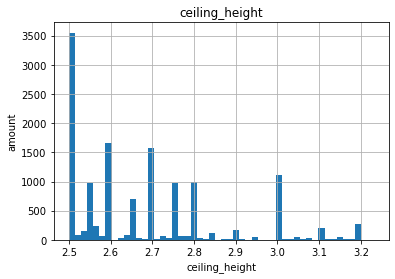

In [48]:
dx = df.hist(column='ceiling_height', bins=50, range=(2.5, 3.23))
dx = dx[0]
for x in dx:
    x.set_xlabel("ceiling_height")
    x.set_ylabel("amount")

In [49]:
df['ceiling_height'].describe()

count    13617.000000
mean         2.681153
std          0.183637
min          2.500000
25%          2.500000
50%          2.640000
75%          2.760000
max          3.210000
Name: ceiling_height, dtype: float64

**Изучим время продажи квартиры. Постром гистограмму. Посчитаем среднее и медиану**

Построим гистограмму времени продажи квартир

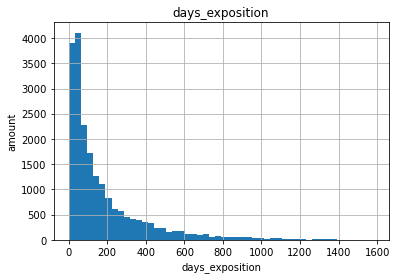

In [50]:
fx = df.hist(column='days_exposition', bins=50)
fx = fx[0]
for x in fx:
    x.set_xlabel("days_exposition")
    x.set_ylabel("amount")

Посчитаем среднее время продажи квартиры

In [51]:
df['days_exposition'].mean()

180.88864135742188

Посчитаем медианное время продажи квартиры

In [52]:
df['days_exposition'].median()

95.0

Посмотрим на статистические данные о времени продажи квартир

In [53]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888641
std        219.728500
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Обычно продажа занимает 95 дней (медианное значение), но есть очень долгие продажи, из-за которых среднее время продажи составляет 180 дней.  
Очень долгой можно считать продажу более 512 дней (максимальное значение по диаграмме размаха - (232 + (232 - 45) * 1.5), очень быструю продажу определеить не получается.

**Уберем из данных очень долгие продажи и построим гистограмму**

In [54]:
df.loc[df['days_exposition'] > 512, 'days_exposition'] = np.nan

<AxesSubplot:>

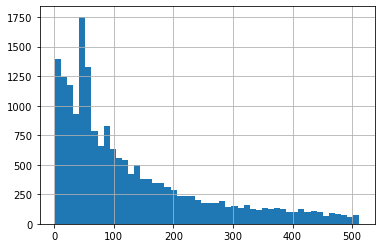

In [55]:
df['days_exposition'].hist(bins=50)

In [56]:
df['days_exposition'].describe()

count    18849.000000
mean       128.753891
std        121.530487
min          1.000000
25%         41.000000
50%         85.000000
75%        183.000000
max        512.000000
Name: days_exposition, dtype: float64

Диграмма представляет из себя диграмму Пуассона, медианное значение стало 85.

**Исследуем какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года**

Построим матрицу корреляции по всем параметрам.

In [57]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,living_to_total,kitchen_to_total
total_images,1.000000,0.158300,0.126016,0.104829,0.028935,0.010427,0.104780,0.031340,0.010532,-0.029303,...,-0.008347,-0.011553,-0.003034,0.018031,0.132780,-0.010433,0.005043,0.140411,0.000565,-0.026039
last_price,0.158300,1.000000,0.695302,0.452862,0.446381,0.184911,0.582655,0.127349,0.022223,-0.069470,...,0.039126,0.145720,-0.051808,0.049853,0.608790,-0.015240,0.005417,-0.003480,0.023656,-0.120466
total_area,0.126016,0.695302,1.000000,0.789250,0.361793,-0.022241,0.905447,-0.020112,0.019473,-0.112063,...,0.025392,0.126244,-0.053277,0.109284,0.117349,-0.011361,0.006441,-0.061731,0.214787,-0.373227
rooms,0.104829,0.452862,0.789250,1.000000,0.175109,-0.228704,0.840303,-0.154976,-0.003095,-0.156269,...,-0.055893,0.089150,-0.050411,0.108641,0.036437,-0.002930,-0.004158,-0.057842,0.499838,-0.606983
ceiling_height,0.028935,0.446381,0.361793,0.175109,1.000000,0.047506,0.339155,0.040609,0.061709,0.021774,...,-0.043705,0.213485,-0.130044,0.079607,0.377853,-0.021603,-0.003822,-0.095942,-0.118945,0.084416
floors_total,0.010427,0.184911,-0.022241,-0.228704,0.047506,1.000000,-0.169311,0.678059,-0.026351,0.070151,...,0.097527,-0.122735,0.038864,-0.052924,0.148098,0.013151,0.016651,0.007845,-0.366147,0.350479
living_area,0.104780,0.582655,0.905447,0.840303,0.339155,-0.169311,1.000000,-0.097210,0.026969,-0.056231,...,-0.050167,0.148933,-0.081674,0.115509,0.226346,-0.005605,-0.002483,-0.072696,0.418909,-0.481769
floor,0.031340,0.127349,-0.020112,-0.154976,0.040609,0.678059,-0.097210,1.000000,-0.013294,0.036940,...,0.073045,-0.076312,0.024850,-0.040829,0.129068,0.012347,0.019387,0.004915,-0.264613,0.244230
is_apartment,0.010532,0.022223,0.019473,-0.003095,0.061709,-0.026351,0.026969,-0.013294,1.000000,-0.003657,...,-0.033410,0.023989,0.003357,-0.012684,0.044725,-0.009492,0.002369,0.009413,0.002081,0.023800
studio,-0.029303,-0.069470,-0.112063,-0.156269,0.021774,0.070151,-0.056231,0.036940,-0.003657,1.000000,...,0.009134,0.000939,0.002606,-0.029978,0.015636,-0.000843,0.000976,0.011961,0.088780,NaN


Из таблицы корреляции видно, что на цену больше всего влияет площадь квартиры (площадь жилую и площадь кухни будем считать зависимыми друг от друга параметрами), за ней идет высота потолков, за ней идет количество комнат, далее идут количесчтво водоёмов в радиусе 3 км и близость к центру города (корреляция отрицательная, значит чем дальше - тем дороже). 

Построим сводную таблицу зависимости цены от категории этажа

In [58]:
df.pivot_table(index='floor_category', values='last_price', aggfunc=['median', 'mean', 'count'])

,median,mean,count
,last_price,last_price,last_price
floor_category,,,
another,4600000.0,5044223.5,15863
first,3830000.0,4139007.5,2781
last,4000000.0,4475824.5,3021


Из сводной таблицы видно, что на первом этаже квартиры стоят дешевле и по среднему и по медианному значению, средняя квартира (медиана) дороже всего стоят квартиры на этажах, кроме первого и последнего.  

Построим сводную таблицу зависимости цены от дня недели выставления на продажу.

In [59]:
df.pivot_table(index='first_day_exposition_day', values='last_price', aggfunc=['median', 'mean', 'count'])

,median,mean,count
,last_price,last_price,last_price
first_day_exposition_day,,,
0,4400000.0,4847434.5,3299
1,4500000.0,4905660.5,3834
2,4490000.0,4884044.5,3618
3,4400000.0,4856807.5,3875
4,4360000.0,4826608.5,3682
5,4400000.0,4745465.5,1787
6,4390000.0,4781053.5,1570


Из полученной таблицы видно, что цена не зависит от дня выставления на продажу.

Построим сводную таблицу зависимости цены от месяца выставления на продажу.

In [60]:
df.pivot_table(index='first_day_exposition_month', values='last_price', aggfunc=['median', 'mean', 'count'])

,median,mean,count
,last_price,last_price,last_price
first_day_exposition_month,,,
1,4400000.0,4801527.0,1357
2,4400000.0,4845414.0,2417
3,4433484.0,4809579.0,2369
4,4564580.0,4953743.5,2182
5,4350000.0,4833370.5,1163
6,4200000.0,4680889.5,1619
7,4380596.0,4855458.0,1544
8,4395000.0,4859378.0,1601


Из полученной таблицы видно, что цена не зависит от месяца выставления на продажу.

Построим сводную таблицу зависимости цены от года выставления на продажу.

In [61]:
df.pivot_table(index='first_day_exposition_year', values='last_price', aggfunc=['median', 'mean', 'count'])

,median,mean,count
,last_price,last_price,last_price
first_day_exposition_year,,,
2014,5500000.0,5782435.5,89
2015,4900000.0,5255896.5,1016
2016,4300000.0,4809851.5,2522
2017,4300000.0,4779288.5,7502
2018,4395000.0,4777875.0,7921
2019,4800000.0,5110409.5,2615


Из полученной таблицы видно, что цена в 2014 году была максимальной, но мало записей за этот год, поэтому считаю, что этим данным доверять нельзя (могут влиять выбросы, достаточно небольшого количества очень дорогих квартир для изменения средней цены). В 2016-2018 годах стоимость была одиннаковой, в 2015 и 2019 гожах стоимость средней вартиры была выше, чем в 2016-2018 годах.

In [62]:
df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.695302,0.452862,-0.345619
total_area,0.695302,1.000000,0.789250,-0.183571
rooms,0.452862,0.789250,1.000000,-0.173809
cityCenters_nearest,-0.345619,-0.183571,-0.173809,1.000000


По таблице корреляции видно, что на цену объекта сильнее всего вляет площадь объекта (что логично, ведь цену обычно рассчитывают из стоимости квадратного метра), количество комнат (что тоже логично, как правило, чем больше комнат - тем больше квартира и выше её стоимость), за ними идет удаленность от центра (коэффициент отрицательный так как чем дальше. тем дешевле).

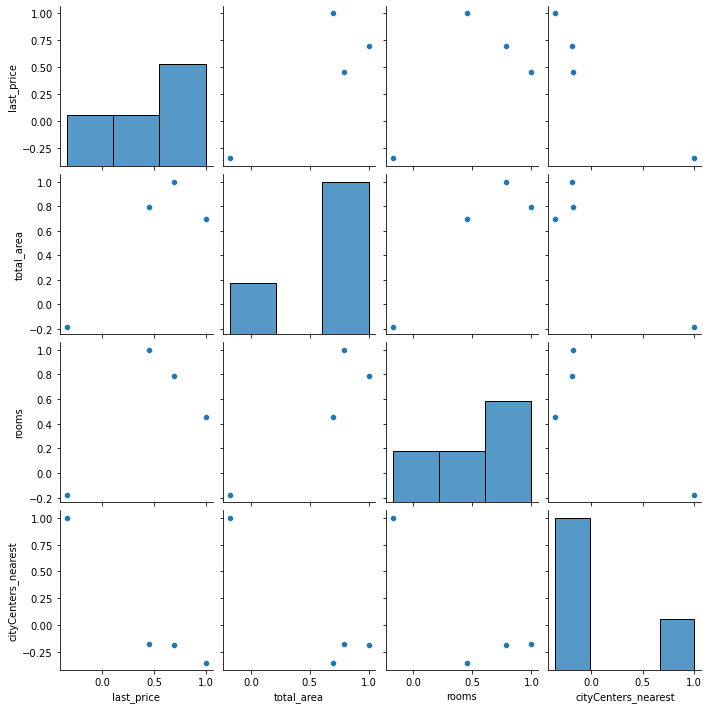

In [63]:
sns.pairplot(df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr())

Построим столбчатую диаграмму стоимости квартир от категории этажа.

<AxesSubplot:title={'center':'floor_category'}, xlabel='floor_categoty', ylabel='mean_price'>

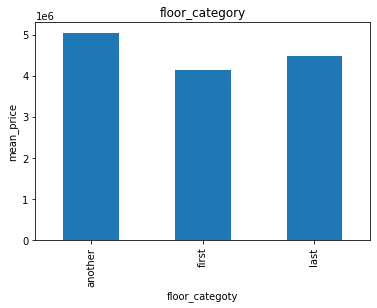

In [64]:
df.groupby(by='floor_category')['last_price'].mean().\
    plot(kind='bar', xlabel='floor_categoty', ylabel='mean_price', title = 'floor_category')

Из графика видно, что на первом этаже квартиры стоят дешевле всего, дороже всего стоят квартиры на этажах, кроме первого и последнего.  

Построим столбчатую диаграмму стоимости квартир от дня выставки на продажу.

<AxesSubplot:title={'center':'first_day_exposition_day'}, xlabel='first_day_exposition_day', ylabel='mean_price'>

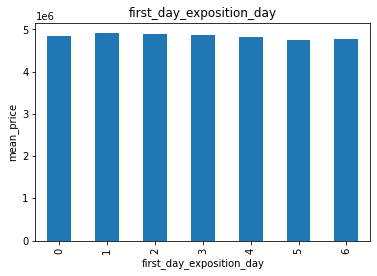

In [65]:
df.groupby(by='first_day_exposition_day')['last_price'].mean().\
    plot(kind='bar', xlabel='first_day_exposition_day', ylabel='mean_price', title = 'first_day_exposition_day')

Стоимость продажи не зависит от дня размещения объявления.

Построим столбчатую диаграмму стоимости квартир от месяца выставки на продажу.

<AxesSubplot:title={'center':'first_day_exposition_month'}, xlabel='first_day_exposition_month', ylabel='mean_price'>

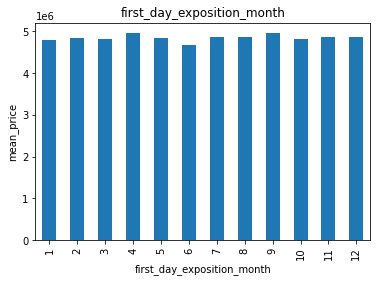

In [66]:
df.groupby(by='first_day_exposition_month')['last_price'].mean().\
    plot(kind='bar', xlabel='first_day_exposition_month', ylabel='mean_price', title = 'first_day_exposition_month')

Стоимость продажи не зависит от месяца размещения объявления.

Построим столбчатую диаграмму стоимости квартир от месяца выставки на продажу.

<AxesSubplot:title={'center':'first_day_exposition_year'}, xlabel='first_day_exposition_year', ylabel='mean_price'>

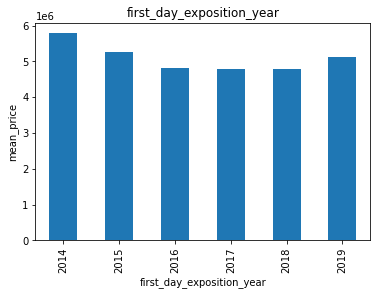

In [67]:
df.groupby(by='first_day_exposition_year')['last_price'].mean().\
    plot(kind='bar', xlabel='first_day_exposition_year', ylabel='mean_price', title = 'first_day_exposition_year')

Из полученной таблицы видно, что цена в 2014 году была максимальной, потом до 2017 года цена снижалась, после 2017 года цена на чала расти.

**Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья**

Выведем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [68]:
df.pivot_table(index='locality_name', values='price_per_sq_m', aggfunc=['mean', 'count'])\
    .sort_values([('count', 'price_per_sq_m')],ascending=False)[:10]

,mean,count
,price_per_sq_m,price_per_sq_m
locality_name,,
Санкт-Петербург,114849.007812,15721
посёлок Мурино,85752.187500,522
посёлок Шушары,78677.367188,440
Всеволожск,68654.476562,398
Пушкин,103125.820312,369
Колпино,75424.578125,338
посёлок Парголово,90175.914062,327
Гатчина,68746.148438,307


<AxesSubplot:title={'center':'locality_name'}, xlabel='locality_name', ylabel='price_per_sq_m'>

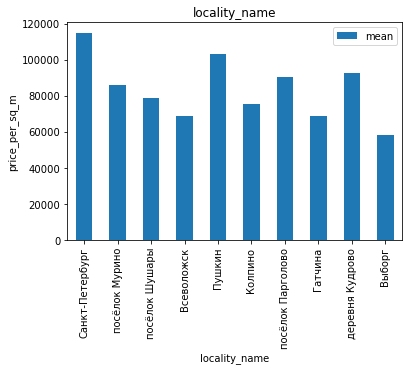

In [69]:
df.groupby(by='locality_name')['price_per_sq_m'].agg({'mean', 'count'}).\
    sort_values(by='count', ascending=False).head(10).\
    plot(kind='bar', y='mean', xlabel='locality_name', ylabel='price_per_sq_m', title = 'locality_name')

Наибольшая средняя цена квадратного метра из этих населённых пунктов в Санкт-Петербурге - 115000, а наименьшая в Выборге - 58000.

**Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге. Выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах. После этого посчитаем среднюю цену для каждого километра. Построим график зависимости цены от удалённости от центра. Определим границу центральной зоны**

Изучим предложения квартир в Санкт-Петербурге. Создадим столбец с расстоянием до цента в километрах округленным до целого значения.

In [70]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] // 1000

Посмотрим как расстояние от центра влияет на среднюю стоимость квадратного метра.

In [71]:
df.query('locality_name == "Санкт-Петербург"').groupby('cityCenters_nearest_km')['price_per_sq_m'].mean()

cityCenters_nearest_km
0.0     187324.125000
1.0     166603.750000
2.0     146662.859375
3.0     129416.343750
4.0     137475.500000
5.0     146979.234375
6.0     152277.890625
7.0     141399.734375
8.0     120581.351562
9.0     110012.546875
10.0    111641.289062
11.0    106790.882812
12.0    108295.765625
13.0    107209.140625
14.0    104986.484375
15.0    101883.117188
16.0    100085.601562
17.0     94095.875000
18.0     94831.953125
19.0     95434.375000
20.0    107046.164062
21.0     91492.687500
22.0     88714.695312
23.0     92720.640625
24.0     82440.343750
25.0     91136.015625
26.0     75171.914062
27.0    132115.718750
28.0     81840.640625
29.0     62482.406250
Name: price_per_sq_m, dtype: float32

Построим график по этим значениям.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

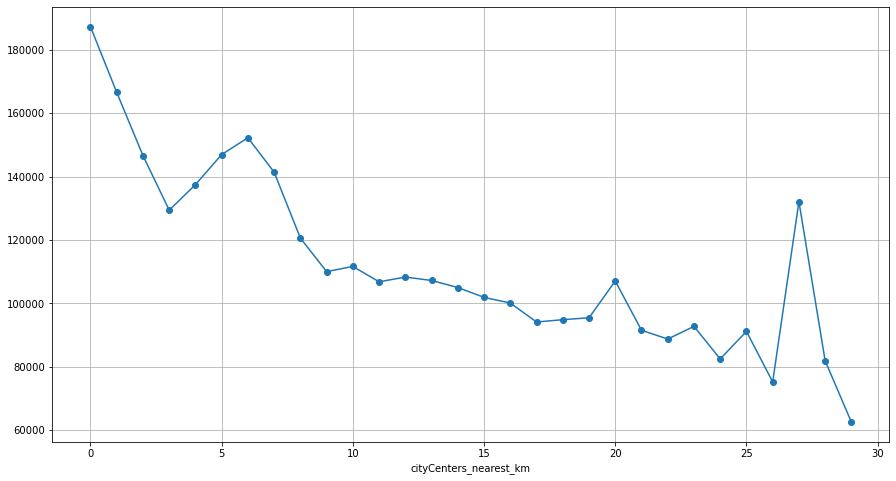

In [72]:
df.query('locality_name == "Санкт-Петербург"')\
    .groupby('cityCenters_nearest_km')['price_per_sq_m'].mean().plot(style ='o-', grid=True, figsize=(15,8))

График резко меняется после 6 км. Будем считать радиус 6 км границей центра

**Выделим сегмент квартир в центре. Проанализируем эту территорию. Выделим факторы, которые влияют на стоимость квартиры**

Проанализируем квартиры расположенные в центре Санкт-Петербурга.

In [73]:
df.query('locality_name == "Санкт-Петербург"' and 'cityCenters_nearest <= 6000').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,living_to_total,kitchen_to_total,cityCenters_nearest_km
count,2851.000000,1833.00,2170.000000,2779.000000,1267.000000,2844.000000,2622.000000,2851.000000,2592.000000,2851.000000,...,2851.000000,2051.000000,2013.000000,2.851000e+03,2851.000000,2851.000000,2851.000000,2622.000000,2592.000000,2851.000000
mean,10.170467,7618628.50,71.111588,2.819359,2.938104,6.627637,56.844048,3.973693,14.731780,0.280253,...,1.294633,459.072662,157.842026,1.433539e+05,2.470361,6.419502,2017.142757,0.586308,0.170674,3.493511
std,6.022448,2144973.25,22.671494,1.239400,0.191363,3.493347,38.735455,2.757130,9.179772,0.711578,...,1.101595,277.086884,134.734406,9.538402e+04,1.705332,3.475542,1.137695,0.116439,0.083437,1.370191
min,0.000000,1600000.00,12.000000,0.000000,2.500000,2.000000,3.000000,1.000000,2.000000,0.000000,...,0.000000,22.000000,3.000000,1.534527e+04,0.000000,1.000000,2014.000000,0.021583,0.025381,0.000000
25%,6.000000,6000000.00,53.000000,2.000000,2.800000,5.000000,33.000000,2.000000,9.300000,0.000000,...,0.000000,215.000000,55.000000,9.864945e+04,1.000000,3.000000,2017.000000,0.518349,0.114504,3.000000
50%,10.000000,7550000.00,70.349998,3.000000,3.000000,5.000000,48.000000,3.000000,12.000000,0.000000,...,1.000000,444.000000,110.000000,1.217105e+05,2.000000,6.000000,2017.000000,0.600000,0.148680,4.000000
75%,15.000000,9200000.00,89.000000,4.000000,3.100000,7.000000,68.900002,5.000000,17.000000,0.000000,...,2.000000,669.000000,244.000000,1.545674e+05,4.000000,10.000000,2018.000000,0.668078,0.201681,5.000000
max,50.000000,11900000.00,114.599998,6.000000,3.210000,25.000000,409.000000,25.000000,107.000000,5.000000,...,3.000000,1293.000000,512.000000,1.907500e+06,6.000000,12.000000,2019.000000,0.983447,0.636986,5.000000


Средняя площадь этих квартир 71 м2, медианная площадь - 70 м2.  
Средняя цена этих квартир 7618630, медианная цена - 7550000.  
Средняя цена квадратного метра этих квартир 143353, медианная цена - 121705.  
Среднее и медианное количество комнат в этих квартирах 2,8 и 3, соответственно. 
Средняя и медианная высота потолков в этих квартирах 2,9 и 3.1 м, соответственно. 

In [74]:
df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]\
    .query('locality_name == "Санкт-Петербург"' and 'cityCenters_nearest <= 6000').corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.686385,0.486093,-0.086959
total_area,0.686385,1.000000,0.736621,-0.084844
rooms,0.486093,0.736621,1.000000,-0.110647
cityCenters_nearest,-0.086959,-0.084844,-0.110647,1.000000


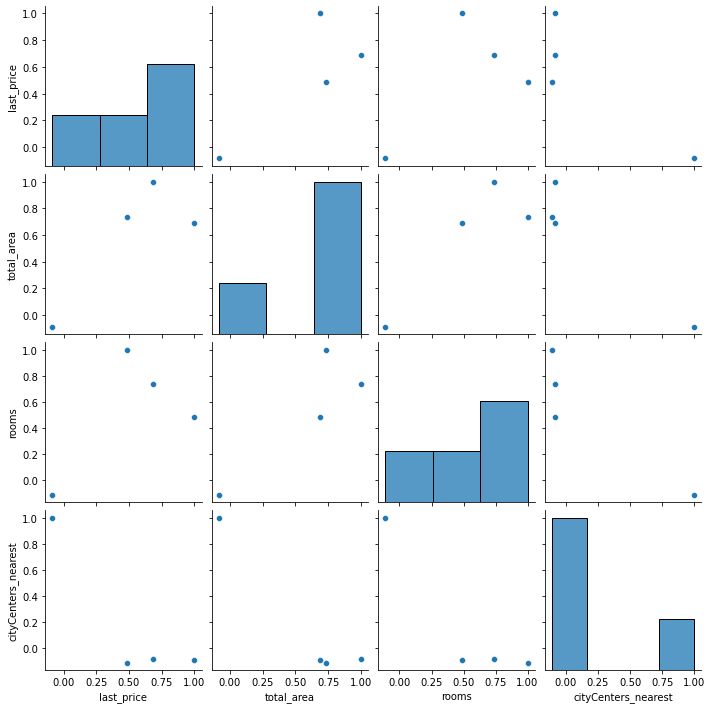

In [75]:
sns.pairplot(df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]\
    .query('locality_name == "Санкт-Петербург"' and 'cityCenters_nearest <= 6000').corr())

<AxesSubplot:title={'center':'floor_category'}, xlabel='floor_categoty', ylabel='mean_price'>

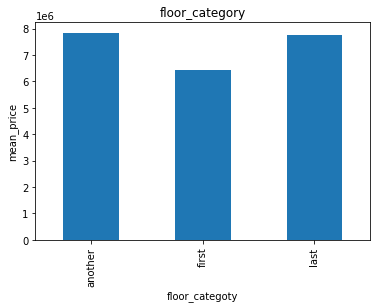

In [76]:
df.query('locality_name == "Санкт-Петербург"' and 'cityCenters_nearest <= 6000')\
    .groupby(by='floor_category')['last_price'].mean().\
    plot(kind='bar', xlabel='floor_categoty', ylabel='mean_price', title = 'floor_category')

<AxesSubplot:title={'center':'first_day_exposition_day'}, xlabel='first_day_exposition_day', ylabel='mean_price'>

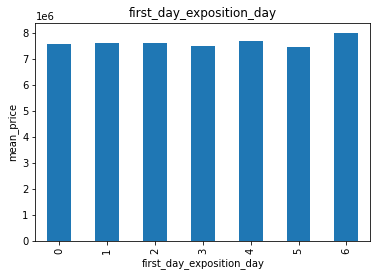

In [77]:
df.query('locality_name == "Санкт-Петербург"' and 'cityCenters_nearest <= 6000')\
    .groupby(by='first_day_exposition_day')['last_price'].mean().\
    plot(kind='bar', xlabel='first_day_exposition_day', ylabel='mean_price', title = 'first_day_exposition_day')

На стоимость квартиры в центре Санкт-Петербурга больше всего влияют - общая площадь и количество комнат.
Удаленность от центра имеет слабую отрицательную корреляцию, день размещения объявления не влияет на стоимость объекта.

**Вывод: Во всей базе и в центре Санкт-Петербурга больше всего на стоимость влияет площадь объекта, допллнительно влияет количество комнат, остальные параметры влияют по разному или не влияют, например, по всей базе на стоимость оказывает влияние отдаленность от центра, в данных по центру Санкт-Петербурга удаленность практически не влияет на цену**

## Общий вывод

В данном проекте нашей задачей было провести анализ данных полученных с объявлений о продаже квартир, а именно определить какие из параметры из имеющихся больше влияют на стоимость.  
В ходе выполнения проектов было заполнено множество пропусков. Для уменьшения их количества можно в случае не заполнения данных принимать значение равным на 0, False или NaN.  
 
Были построенны гистограммы распределения по различным параметрам.

Были проведены анализ данных по центру Санкт-Петербурга. 

В ходе работы были выявлены основные параметры влияющие на стоимость квартир. 
На стоимость квартир влияют: 
 - расположение объекта - квартиры в Санкт-Петербурге стоят дороже, чем в других городах;
 - площадь квартиры - чем больше квартира, тем выше её стоимость;
 - этаж квартиры - выше стоимость у квартир расположенных не на первом и последнем этажах;
 - (для Санкт-Петербурга) удаленность от центра города - квартиры в центре стоят одинаково, но после прохождения радиуса в 6 км стоимость квартиры уменьшается при увеличении расстояния до центра.